# Using Keras and Tensorflow for Deep learning
## Based on examples from Geron textbook


This is not a code cell; this is a markdown cell.

Note: In order to get this notebook running in Pycharm, you need to get a Jupyter kernel running that matches your project interpreter.  To do this, you use the following command:
```
source activate myenv
python -m ipykernel install --user --name myenv --display-name "Python (myenv)"
```
Replace `myenv` with your environment's name, keep the ( ) around it for the second instance.




In [93]:
# imports
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [94]:
print('tensorflow version:',tf.__version__)

tensorflow version: 2.1.0


In [95]:
print('keras version:',keras.__version__)

keras version: 2.2.4-tf


### Import the data
We are using a logP dataset that has been featurized with RDKit 2D descriptors.  The dataset has target property, Kow, and 200 numerical features.
`smiles` is the chemical identifier.

In [96]:
df = pd.read_csv('../dataFiles/featurized-logP14k.csv')
df.head(10)

,smiles,Kow,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885,1.837692,804.748825,20.698306,16.613088,16.613088,12.963233,10.142335,10.142335,...,0,0,0,0,0,0,0,0,0,0.667213
1,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190,1.654620,786.237565,21.189870,17.571026,17.571026,13.526347,10.837743,10.837743,...,0,0,0,0,0,0,0,0,0,0.700523
2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100,1.664596,827.224695,21.189870,17.454710,17.454710,13.526347,10.684315,10.684315,...,0,0,0,0,0,0,0,0,0,0.728839
3,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470,2.535973,461.783925,12.466255,9.318603,9.318603,8.108226,5.333716,5.333716,...,0,0,0,0,0,0,0,0,1,0.736884
4,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400,1.846855,756.963371,17.386387,13.289420,13.289420,11.340277,7.651541,7.651541,...,0,0,0,0,0,0,0,0,0,0.410670
5,CCC1(CC)C(=O)NC(=O)N(C)C1=O,1.150,3.115228,294.432192,10.930721,8.586172,8.586172,6.491235,4.628120,4.628120,...,0,0,0,0,0,0,0,0,1,0.656908
6,CCC1(c2ccccc2)NC(=O)N(C)C1=O,1.690,2.499092,429.904718,11.759149,9.357568,9.357568,7.615026,5.274019,5.274019,...,0,0,0,0,0,0,0,0,1,0.764131
7,O=P1(N(CCCl)CCCl)NCCCO1,0.630,2.582264,201.866476,10.441311,7.916600,10.322885,6.726492,4.597962,7.244517,...,0,0,0,0,0,0,0,0,0,0.605721
8,CC(O)C(=O)O,-0.720,3.257586,57.058650,5.154701,3.380026,3.380026,2.642734,1.551955,1.551955,...,0,0,0,0,0,0,0,0,0,0.453936
9,CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C(C(=O)CO)CCC12,1.940,1.700111,637.807307,17.982763,15.331880,15.331880,11.808533,9.865486,9.865486,...,0,0,0,0,0,0,0,0,0,0.806020


In [97]:
from features import targets_features
# split up the data using 20% for testing
train_features_full, test_features, train_target_full, test_target, feature_list = targets_features(df, 'Kow')

# get validation data from training data
train_features, val_features, train_target, val_target = train_test_split(train_features_full,train_target_full)

### Scale data using sklearn StandardScalar()

In [98]:
# scale feature vectors
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

### Specify the neural network architecture
First let's create a simple neural network using the Keras `Sequential` API.

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=train_features.shape[1:]),
    # keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)  # output layer
])

model.compile(loss = "mean_squared_error", optimizer='rmsprop')
history = model.fit(train_features, train_target, epochs=30,
                    validation_data=(val_features,val_target))
mse_test = model.evaluate(test_features, test_target)
print('\nTest MSE {:.4f}'.format(mse_test))

Train on 8497 samples, validate on 2833 samples
Epoch 1/30
8497/8497 [==============================] - 2s 203us/sample - loss: 1.0319 - val_loss: 0.5658

### Visualize the model training

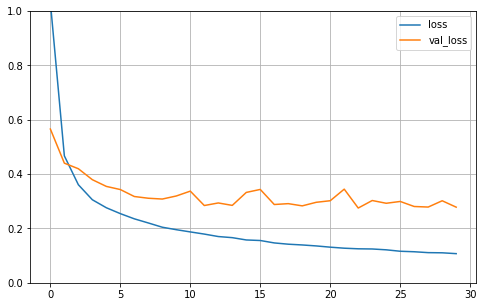

In [100]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [101]:
tf.config.list_physical_devices()


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1
